In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [262]:
#load the data
app = pd.read_csv("application_data.csv")
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [263]:
#find the percentage of missing values in data
a = len(app)
null = app.isnull().sum()/a*100
null.max()

69.87229725115525

In [264]:
#drop all the columns which have null values more than 45%
drop = null[null>45].index
app.drop(drop,axis = 1 ,inplace = True)

In [265]:
app.shape

(307511, 73)

In [266]:
#find other null values
app.isnull().sum().max()

96391

In [267]:
#still data have lots of null values lets drop all null records which are more tham  %
a = len(app)
null1 = app.isnull().sum()/a*100
null1

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

In [268]:
null1.sort_values(ascending = False).head(20)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
dtype: float64

In [269]:
#Fill remailning NA values
#First fill NA values in OCCUPATION_TYPE 
# OCCUPATION_TYPE is categorical type column so mode or another category is suitable in this case mode is suitable
app['OCCUPATION_TYPE'].mode()[0]
app['OCCUPATION_TYPE'].fillna(app['OCCUPATION_TYPE'].mode()[0],inplace = True)
app['OCCUPATION_TYPE'].isnull().sum()

0

<AxesSubplot:xlabel='EXT_SOURCE_3'>

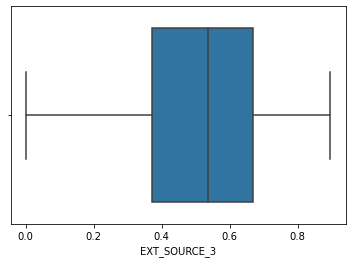

In [270]:
#Fill NA values in EXT_SOURCE_3 
#As EXT_SOURCE_3 is continuos data column fill either by median or by mean
#first check for outliers
sns.boxplot(app['EXT_SOURCE_3'])

In [271]:
#As there are no outliers lets fill EXT_SOURCE_3 by median
app['EXT_SOURCE_3'].median()
app['EXT_SOURCE_3'].mean()
# as there is negligible difference in mean and median we fill na by one of the here we choose median to fill Na

0.5108529061800121

In [272]:
app['EXT_SOURCE_3'].fillna(app['EXT_SOURCE_3'].median(),inplace=True)

In [273]:
app['EXT_SOURCE_3'].isnull().sum()

0

In [274]:
#Fill NAs in AMT_REQ_CREDIT_BUREAU_YEAR
app['AMT_REQ_CREDIT_BUREAU_YEAR'].tail(50)
#It seems to be there is no decimal value in this column lets fill this column with mode
app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0],inplace = True)

In [275]:
app['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()

0

In [276]:
# Fill NA values in AMT_REQ_CREDIT_BUREAU_QRT column
app['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_QRT'>

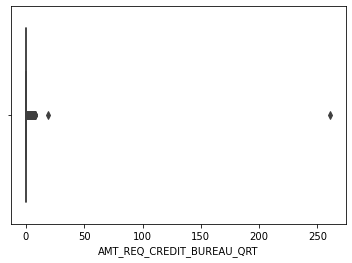

In [277]:
#check for outliers in AMT_REQ_CREDIT_BUREAU_QRT
sns.boxplot(app['AMT_REQ_CREDIT_BUREAU_QRT'])

In [278]:
#as outlier is present in dataset we need to fill column by median
app['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace = True)

In [279]:
app['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [280]:
#Fill NA values in AMT_REQ_CREDIT_BUREAU_MON
app['AMT_REQ_CREDIT_BUREAU_MON'].tail(20)
app['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
27.0         1
22.0         1
23.0         1
24.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_MON'>

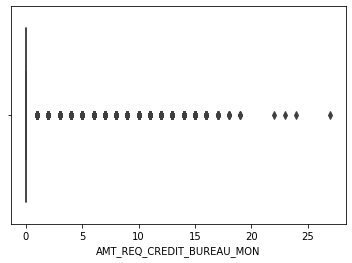

In [281]:
#Check for outliers
sns.boxplot(app['AMT_REQ_CREDIT_BUREAU_MON'])

In [282]:
#as there is not much effect of outliers on data we fill it with median
app['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app['AMT_REQ_CREDIT_BUREAU_MON'].median(),inplace = True)

In [283]:
app['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [284]:
#Fill NA values in AMT_REQ_CREDIT_BUREAU_WEEK
app['AMT_REQ_CREDIT_BUREAU_WEEK'].tail(20)
app['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [285]:
# as there is no decimal values in entire column so we fill it by median value
app['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace = True)

In [286]:
app['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [287]:
#Fill NA values in AMT_REQ_CREDIT_BUREAU_DAY
app['AMT_REQ_CREDIT_BUREAU_DAY'].tail(25)
app['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

<AxesSubplot:xlabel='AMT_REQ_CREDIT_BUREAU_DAY'>

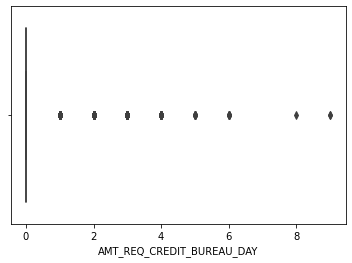

In [288]:
#Check for outliers
sns.boxplot(app['AMT_REQ_CREDIT_BUREAU_DAY'])

In [289]:
# as outliers are close together we can fill NA values with median or mean in this case we choose median as there is no decimal value in column
app['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace = True)

In [290]:
app['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [291]:
#Fill NA values in AMT_REQ_CREDIT_BUREAU_HOUR
app['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [292]:
#in this case we need to fill NAs with median
app['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app['AMT_REQ_CREDIT_BUREAU_HOUR'].median,inplace = True)

In [293]:
app['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [294]:
#Fill NA in column NAME_TYPE_SUITE
app['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [295]:
#As this column is categorical column we need to fill this one by mode
app['NAME_TYPE_SUITE'].fillna(app['NAME_TYPE_SUITE'].mode()[0],inplace = True)

In [296]:
app['NAME_TYPE_SUITE'].isnull().sum()

0

In [297]:
#Fill NA values in AMT_GOODS_PRICE
app['AMT_GOODS_PRICE']

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

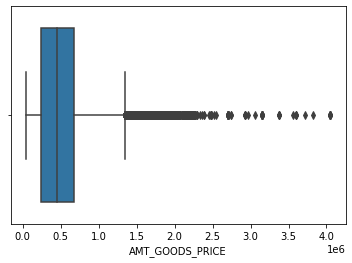

In [298]:
#Check for outliers
sns.boxplot(app['AMT_GOODS_PRICE'])

In [299]:
#As there are outliers are present we need to fill NAs with median so that analysis shold not be affect by them
app['AMT_GOODS_PRICE'].fillna(app['AMT_GOODS_PRICE'].median(),inplace = True)

In [300]:
app['AMT_GOODS_PRICE'].isnull().sum()

0

In [301]:
app = app[~(app['OBS_30_CNT_SOCIAL_CIRCLE'].isnull())]

In [302]:
app['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [303]:
app = app[~(app['DEF_30_CNT_SOCIAL_CIRCLE'].isnull())]

In [304]:
app['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [305]:
app = app[~(app['OBS_60_CNT_SOCIAL_CIRCLE'].isnull())]

In [306]:
app['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [307]:
app = app[~(app['DEF_60_CNT_SOCIAL_CIRCLE'].isnull())]

In [308]:
app['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [309]:
app = app[~(app['EXT_SOURCE_2'].isnull())]

In [310]:
app['EXT_SOURCE_2'].isnull().sum()

0

In [311]:
app = app[~(app['AMT_ANNUITY'].isnull())]

In [312]:
app['AMT_ANNUITY'].isnull().sum()

0

In [313]:
app = app[~(app['CNT_FAM_MEMBERS'].isnull())]

In [314]:
app['CNT_FAM_MEMBERS'].isnull().sum()

0

In [315]:
app = app[~(app['DAYS_LAST_PHONE_CHANGE'].isnull())]

In [316]:
app['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [317]:
app.isnull().sum().max()
#All null values are now handled

0

In [318]:
#check for data types of columns
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305820 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305820 non-null  int64  
 1   TARGET                       305820 non-null  int64  
 2   NAME_CONTRACT_TYPE           305820 non-null  object 
 3   CODE_GENDER                  305820 non-null  object 
 4   FLAG_OWN_CAR                 305820 non-null  object 
 5   FLAG_OWN_REALTY              305820 non-null  object 
 6   CNT_CHILDREN                 305820 non-null  int64  
 7   AMT_INCOME_TOTAL             305820 non-null  float64
 8   AMT_CREDIT                   305820 non-null  float64
 9   AMT_ANNUITY                  305820 non-null  float64
 10  AMT_GOODS_PRICE              305820 non-null  float64
 11  NAME_TYPE_SUITE              305820 non-null  object 
 12  NAME_INCOME_TYPE             305820 non-null  object 
 13 

In [319]:
app['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         277620
Revolving loans     28200
Name: NAME_CONTRACT_TYPE, dtype: int64

In [320]:
app['DAYS_BIRTH'].head(10)
#AS DAYS_BIRTH is negative column we need to conver it into positive

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
5   -16941
6   -13778
7   -18850
8   -20099
9   -14469
Name: DAYS_BIRTH, dtype: int64

In [321]:
app['DAYS_BIRTH'] = app['DAYS_BIRTH'].abs()

In [322]:
app['DAYS_BIRTH'].head(10)

0     9461
1    16765
2    19046
3    19005
4    19932
5    16941
6    13778
7    18850
8    20099
9    14469
Name: DAYS_BIRTH, dtype: int64

In [323]:
#As age of applicants is in days we need to calculate them in years
app['Age_Years'] = app['DAYS_BIRTH'].apply(lambda x:x//365)

In [324]:
app['Age_Years'].head(10)

0    25
1    45
2    52
3    52
4    54
5    46
6    37
7    51
8    55
9    39
Name: Age_Years, dtype: int64

In [325]:
#Lets check other columns which contains days
app['DAYS_EMPLOYED'].head(10)
#DAYS_EMPLOYED column is also negative and contains data in days

0      -637
1     -1188
2      -225
3     -3039
4     -3038
5     -1588
6     -3130
7      -449
8    365243
9     -2019
Name: DAYS_EMPLOYED, dtype: int64

In [326]:
app['DAYS_REGISTRATION'].head(10)
#DAYS_REGISTRATION column is also negative column and it contains data in days

0    -3648.0
1    -1186.0
2    -4260.0
3    -9833.0
4    -4311.0
5    -4970.0
6    -1213.0
7    -4597.0
8    -7427.0
9   -14437.0
Name: DAYS_REGISTRATION, dtype: float64

In [327]:
app['DAYS_ID_PUBLISH'].head()
#DAYS_ID_PUBLISH column is also negative column and it contains data in days

0   -2120
1    -291
2   -2531
3   -2437
4   -3458
Name: DAYS_ID_PUBLISH, dtype: int64

In [328]:
#lets convert them into positive columns
app['DAYS_EMPLOYED'] = app['DAYS_EMPLOYED'].abs()
app['DAYS_REGISTRATION'] = app['DAYS_REGISTRATION'].abs()
app['DAYS_ID_PUBLISH'] = app['DAYS_ID_PUBLISH'].abs()

In [329]:
app['DAYS_ID_PUBLISH'].head()

0    2120
1     291
2    2531
3    2437
4    3458
Name: DAYS_ID_PUBLISH, dtype: int64

In [330]:
#Lets conver DAYS_EMPLOYED to years of employed
app['Years_Employed'] = app['DAYS_EMPLOYED'].apply(lambda x:x//365)

In [331]:
#Lets conver DAYS_REGISTRATION to years of registration
app['Years_Registration'] = app['DAYS_REGISTRATION'].apply(lambda x:x//365)

In [332]:
app['Years_Registration'].head()

0     9.0
1     3.0
2    11.0
3    26.0
4    11.0
Name: Years_Registration, dtype: float64

In [333]:
#convert DAYS_ID_PUBLISH to year of if publish
app['Year_ID_publish']=app['DAYS_ID_PUBLISH'].apply(lambda x:x//365)

In [334]:
app['Year_ID_publish'].head()

0    5
1    0
2    6
3    6
4    9
Name: Year_ID_publish, dtype: int64

In [335]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Years,Years_Employed,Years_Registration,Year_ID_publish
count,305820.000000,305820.000000,305820.000000,3.058200e+05,3.058200e+05,305820.000000,3.058200e+05,305820.000000,305820.000000,305820.000000,...,305820.000000,305820.000000,305820.000000,305820.000000,305820.000000,305820.000000,305820.000000,305820.000000,305820.000000,305820.000000
mean,278188.472039,0.080887,0.417187,1.686781e+05,5.997873e+05,27132.676913,5.388654e+05,0.020845,16036.888353,67698.537195,...,0.000334,0.006056,0.029763,0.231496,0.230067,1.645605,43.435675,184.949742,13.165270,7.714548
std,102785.791346,0.272663,0.722324,2.374952e+05,4.026801e+05,14483.124889,3.694261e+05,0.013809,4363.116386,139421.301661,...,0.018260,0.102942,0.190593,0.856654,0.745010,1.856160,11.952230,381.910692,9.644208,4.134191
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,189155.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,2.000000,5.000000,4.000000
50%,278210.500000,0.000000,0.000000,1.467607e+05,5.172660e+05,24939.000000,4.500000e+05,0.018850,15749.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000,6.000000,12.000000,8.000000
75%,367152.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34614.000000,6.795000e+05,0.028663,19679.000000,5706.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.000000,15.000000,20.000000,11.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000,1000.000000,67.000000,19.000000


In [336]:
app['CODE_GENDER'].value_counts()

F      201285
M      104531
XNA         4
Name: CODE_GENDER, dtype: int64

In [337]:
#CODE_GENDER column contains XNA values lets drop them
app = app[~(app['CODE_GENDER']=='XNA')]

In [338]:
app['CODE_GENDER'].value_counts()

F    201285
M    104531
Name: CODE_GENDER, dtype: int64

In [339]:
#there are 2 target variables 1.Non-Defaulters 2.Defaulters lets seperate them 
#1.Non-Defaulters
app_ND = app[app['TARGET']==0]

In [340]:
app_ND['TARGET'].value_counts()

0    281079
Name: TARGET, dtype: int64

In [341]:
#2.Defaulters
app_D = app[app['TARGET']==1]

In [342]:
app_D['TARGET'].value_counts()

1    24737
Name: TARGET, dtype: int64

In [343]:
#Analysis
#Univatiate analysis

In [344]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305816 entries, 0 to 307510
Data columns (total 77 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305816 non-null  int64  
 1   TARGET                       305816 non-null  int64  
 2   NAME_CONTRACT_TYPE           305816 non-null  object 
 3   CODE_GENDER                  305816 non-null  object 
 4   FLAG_OWN_CAR                 305816 non-null  object 
 5   FLAG_OWN_REALTY              305816 non-null  object 
 6   CNT_CHILDREN                 305816 non-null  int64  
 7   AMT_INCOME_TOTAL             305816 non-null  float64
 8   AMT_CREDIT                   305816 non-null  float64
 9   AMT_ANNUITY                  305816 non-null  float64
 10  AMT_GOODS_PRICE              305816 non-null  float64
 11  NAME_TYPE_SUITE              305816 non-null  object 
 12  NAME_INCOME_TYPE             305816 non-null  object 
 13 

In [345]:
#1.Check for outliers and univariate analysis


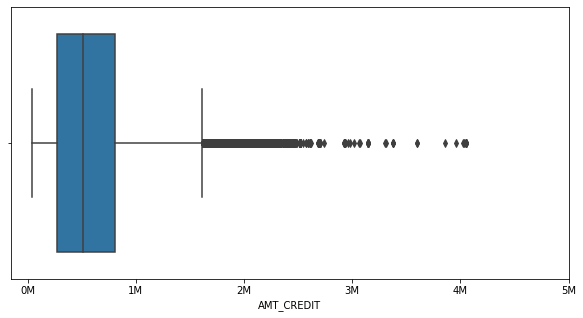

In [346]:
#Outliers in AMT_CREDIT
plt.figure(figsize=(10,5))
tick = np.arange(0,6000000,1000000)
b = sns.boxplot(app['AMT_CREDIT'])
b.set_xticks(tick)
b.set_xticklabels(['{}M'.format(i//1000000) for i in tick])
plt.show()
#here there are few outliers who took the high amount of credit of around 4+ Millions
#the average loan amount taken by the clients is around 0.5M

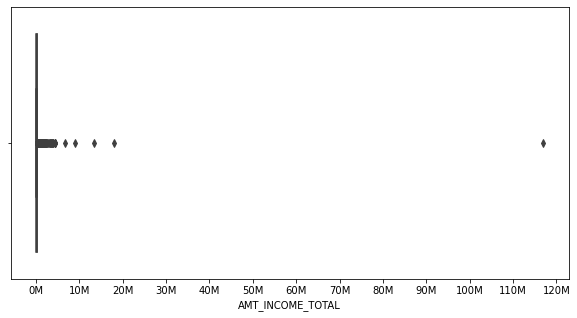

In [347]:
#Outliers in AMT_INCOME_TOTAL
plt.figure(figsize=(10,5))
ticks = np.arange(0,130000000,10000000)
bx = sns.boxplot(app['AMT_INCOME_TOTAL'])
bx.set_xticks(ticks)
bx.set_xticklabels(['{}M'.format(i//1000000) for i in ticks])
plt.show()
#There is one outliers whose total income is around 115+ Millions
#The average income of clients is very less around 0 to 0.5 millions 

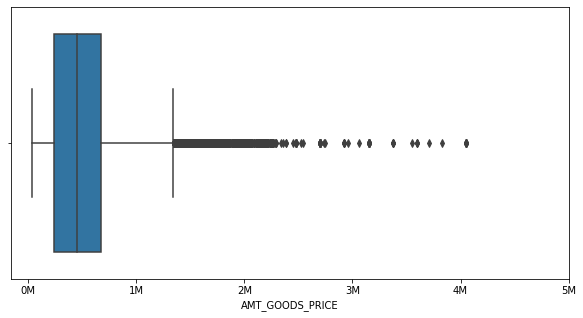

In [348]:
#Outliers in AMT_GOODS_PRICE
plt.figure(figsize=(10,5))
a = sns.boxplot(app['AMT_GOODS_PRICE'])
a.set_xticks(tick)
a.set_xticklabels(['{}M'.format(i//1000000) for i in tick])
plt.show()
#there are few outliers who took loan of around 3.5M to 4.2M good price
#The average good price is around 0.5 millions on which clients spend their loan amount

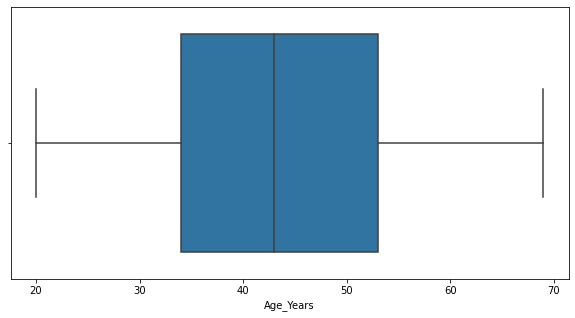

In [349]:
#Check outliers in age of clients
plt.figure(figsize=(10,5))
sns.boxplot(app['Age_Years'])
plt.show()
#there are no outliers in age column
#The average age of the clients is around 42 years

In [350]:
# Analysis of gender of clients
app['CODE_GENDER'].value_counts()

F    201285
M    104531
Name: CODE_GENDER, dtype: int64

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

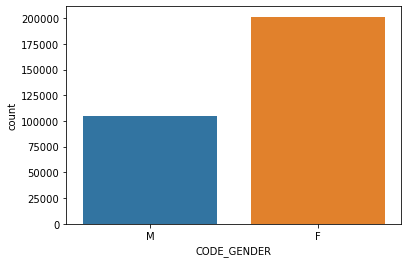

In [257]:
sns.countplot(app['CODE_GENDER'])
#there are almost 2X female clients than mail clients

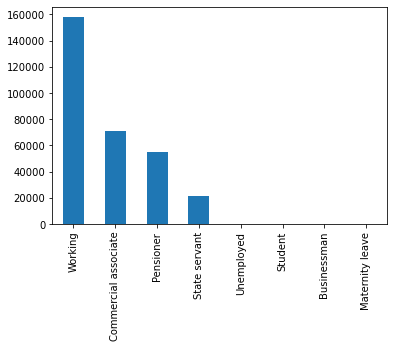

In [379]:
#Analysis of NAME_INCOME_TYPE
app['NAME_INCOME_TYPE'].value_counts().plot.bar()
plt.show()
# Most of the credit applicants are working 

<AxesSubplot:>

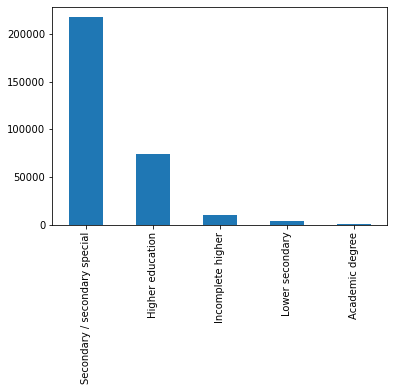

In [380]:
#Analysis of NAME_EDUCATION_TYPE 
app['NAME_EDUCATION_TYPE'].value_counts().plot.bar()
#most fo the applicants are applied for loan whos education is secondary or secondary special
# People who completed thier acadamic degree have good job and have money thats why number of people are less

Text(0.5, 1.0, 'Defaulters')

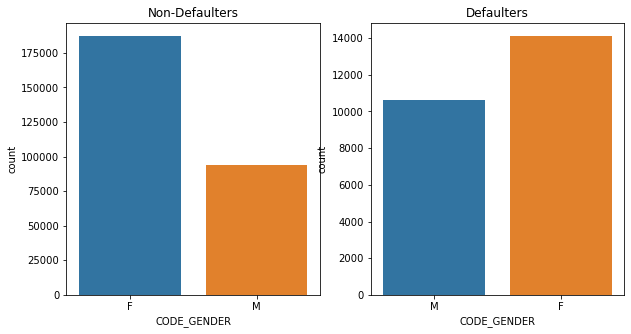

In [386]:
#analysis on defaulyers and non defaulters (Gender wise)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(app_ND['CODE_GENDER'])
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(app_D['CODE_GENDER'])
plt.title('Defaulters')
#as we can see on graph females have more count of non defaulters than males same for defaulters aso but if we copare both 
## defaulters and non defaulters graphs males are more defaulters than non defaulters as males facing more problems to repay the loan

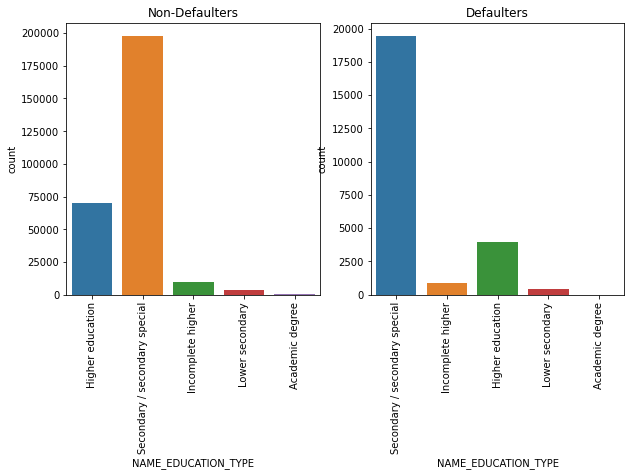

In [420]:
#Education type
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(app_ND['NAME_EDUCATION_TYPE'])
plt.xticks(rotation = 90)
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(app_D['NAME_EDUCATION_TYPE'])
plt.xticks(rotation = 90)
plt.title('Defaulters')
plt.show()
#As we observe in the graph clients who completed their secondary education are higher in Defaulter as well as in non defaulters

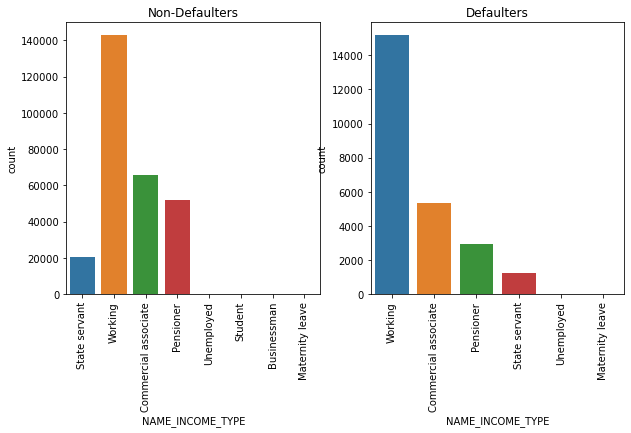

In [410]:
#income type
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(app_ND['NAME_INCOME_TYPE'])
plt.xticks(rotation = 90)
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.countplot(app_D['NAME_INCOME_TYPE'])
plt.xticks(rotation = 90)
plt.title('Defaulters')
plt.show()

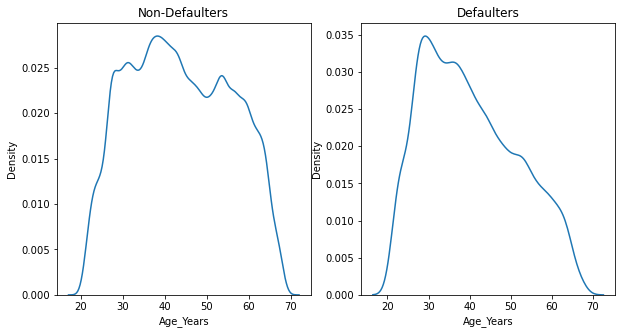

In [414]:
#analysis on age group 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(app_ND['Age_Years'],bins =10,hist = False)
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.distplot(app_D['Age_Years'],bins = 10,hist = False)
plt.title('Defaulters')
plt.show()
# As per observation of graph number of defaulters are decreasing as increasing the age group

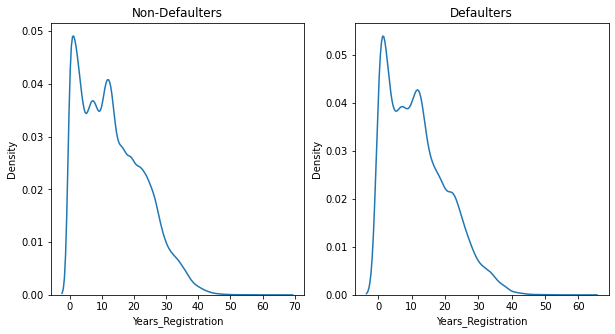

In [419]:
#Analysis on basis of clients period of existance Years_Registration
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(app_ND['Years_Registration'],bins =1,hist = False)
plt.title('Non-Defaulters')
plt.subplot(1,2,2)
sns.distplot(app_D['Years_Registration'],bins = 1,hist = False)
plt.title('Defaulters')
plt.show()
# there is not much difference in both plots

In [ ]:
#BIVARIATE Analysis


In [ ]:
#income vs age

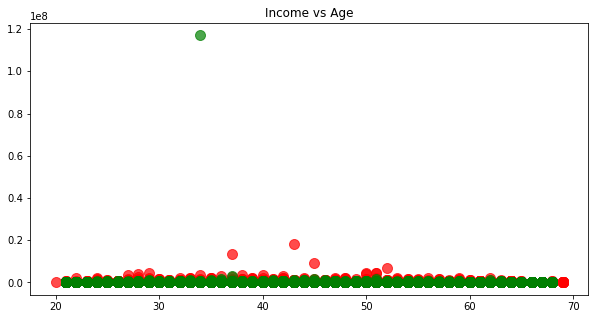

In [437]:
plt.figure(figsize=(10,5))
plt.scatter(app_ND['Age_Years'],app_ND['AMT_INCOME_TOTAL'],s=100,alpha = 0.7,c = 'red',label = 'Non_Defaulters')
plt.scatter(app_D['Age_Years'],app_D['AMT_INCOME_TOTAL'],s=100,alpha = 0.7,c = 'green',label = 'Defaulters')
plt.title('Income vs Age')
plt.show()

In [ ]:
#credit amount vs age


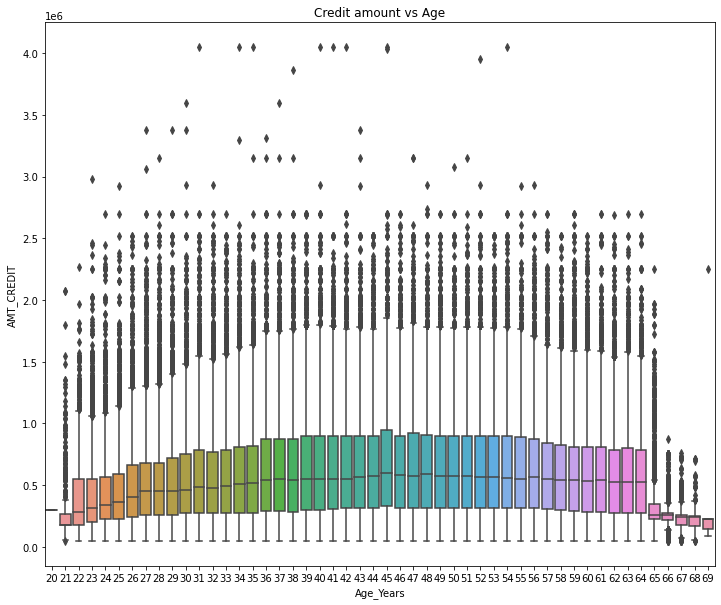

In [448]:
plt.figure(figsize=(12,10))
sns.boxplot(x = app_ND['Age_Years'],y = app_ND['AMT_CREDIT'])
#tick = np.arange(0,4000000,500000)
#bx.set_yticklabels(['{}M'.format(i//500000) for i in tick])
plt.title('Credit amount vs Age')
plt.show()
#as age increases avg credit amount increases also after some interval of age around 50years again avg credit amount decreases

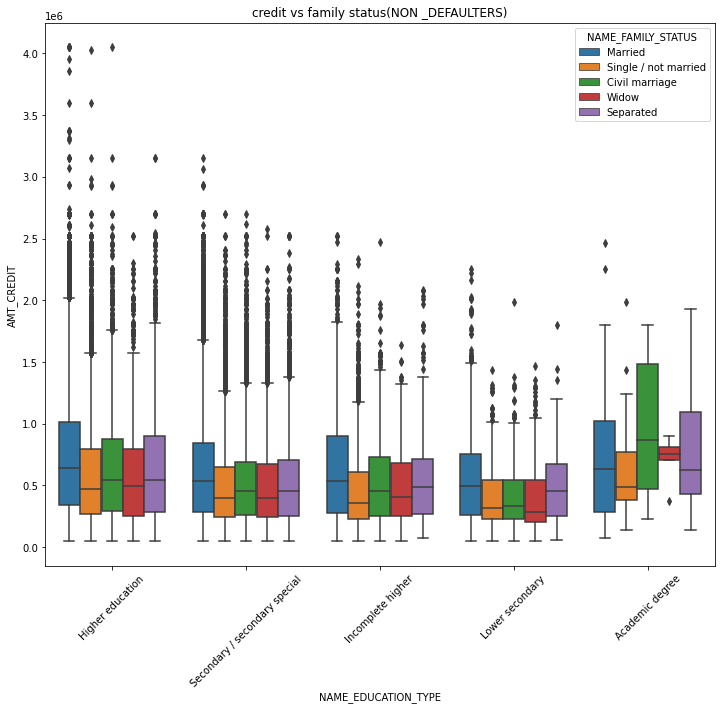

In [450]:
#Credit vs family status
plt.figure(figsize=(12,10))
plt.xticks(rotation=45)
sns.boxplot(data =app_ND, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('credit vs family status(NON _DEFAULTERS)')
plt.show()

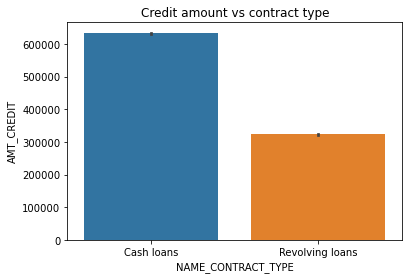

In [452]:
#Credit amount vs contract type NAME_CONTRACT_TYPE
sns.barplot(x = app_ND['NAME_CONTRACT_TYPE'],y =app_ND['AMT_CREDIT'])
plt.title('Credit amount vs contract type')
plt.show()
#cash loans are more than revolving loans

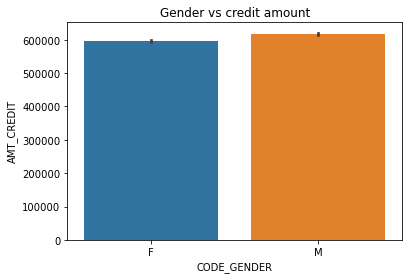

In [453]:
#Gender vs credit amount
sns.barplot(x = app_ND['CODE_GENDER'],y =app_ND['AMT_CREDIT'])
plt.title('Gender vs credit amount')
plt.show()
#males are took more credit amount than females 

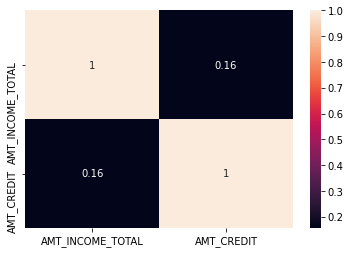

In [461]:
#Correlation
sns.heatmap(app[['AMT_INCOME_TOTAL','AMT_CREDIT']].corr(),annot = True)
plt.show()